In [31]:
import pandas as pd
from statsmodels.tsa.stattools import coint
from itertools import combinations
import matplotlib.pyplot as plt
import numpy as np

In [20]:
SIZE = 1000

In [6]:
# Read in the data file 
df = pd.read_csv("all_prices.csv", parse_dates = ["time"])
df = df[(df['time'] > '2022-11-01') & (df['time'] < '2022-12-01')]
prices_df = df.drop("time", axis = 1)
prices_df.dropna(axis = 1, inplace = True)
prices_df.head()

,btc_price,eth_price,ltc_price,neo_price,xmr_price,xrp_price,zec_price
435286,20481.0,1571.3,55.0585,8.53345,149.72,0.46406,52.6460
435287,20479.0,1571.6,55.1110,8.53900,149.85,0.46413,52.6750
435288,20487.0,1574.0,55.1720,8.54835,150.18,0.46459,52.7040
435289,20489.0,1573.7,55.2310,8.55770,150.07,0.46411,52.7165
435290,20476.0,1572.1,55.1610,8.55360,150.29,0.46341,52.7290


In [17]:
prices_df = prices_df.tail(SIZE)

In [18]:
def engle_granger(ticker1, ticker2, threshold):
    """Returns true if we reject the null hypothesis and therefore there is cointegration"""
    test_result = coint(prices_df[ticker1], prices_df[ticker2])
    return test_result[1] <= threshold

In [28]:
cointegrated_pairs = []
for u, v in combinations(prices_df.columns, 2):
        # print(f"Testing {u} and {v}")
        if u != v:
            if (engle_granger(u, v, 0.20)):
                print(f"Found cointegrated pair: {u} and {v}")
                cointegrated_pairs.append((u, v))

Found cointegrated pair: eth_price and neo_price
Found cointegrated pair: eth_price and zec_price


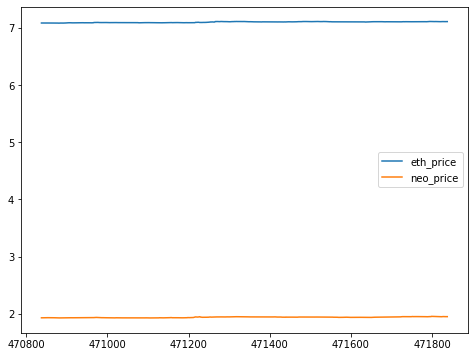

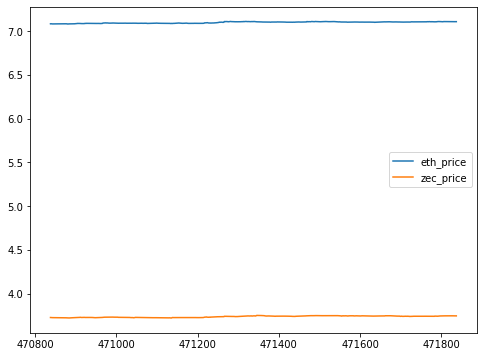

In [34]:
# Plot the cointegrated pairs
for pair in cointegrated_pairs:
    plt.figure(figsize = (8, 6))
    plt.plot(np.log(prices_df[pair[0]]), label = pair[0])
    plt.plot(np.log(prices_df[pair[1]]), label = pair[1])
    plt.legend()
    plt.show()
plt.show()